In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sqlite3
import json
import requests

def get_keys(path):
    with open(path) as f:
        return json.load(f)

In [2]:
#api_key = 'LzLuOPihzWHeArKhhSUX6dck1ranrSvmj4PQqlKgcINBMiBaamvIBi-ddiSGKSZCy2FEvbNFf-Hocn7_09XNcQftUi6WmSC3Y3PxB9UNjX7aVnSE79qoHBtXQ2WIX3Yx'
#Use API key from B-Ref or FG

Put API key in Python file. Can create this with Jupyter. Rename to .py.

For APIs, some need credentials like Yelp, others do not require a login.

Ran pip install baseball_scraper in Terminal

In [3]:
from baseball_scraper import pitching_stats
from baseball_scraper import baseball_reference
tss = baseball_reference.TeamSummaryScraper()
df = tss.scrape(2019)
df.columns

Index(['Franchise', 'abbrev', '#Bat', 'BatAge', 'R/G', 'G', 'PA', 'AB', 'R',
       'H', '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'BA', 'OBP',
       'SLG', 'OPS', 'OPS+', 'TB', 'GDP', 'HBP', 'SH', 'SF', 'IBB', 'LOB'],
      dtype='object')

In [4]:
s = baseball_reference.TeamScraper()
s.set_season(2005)
sox_05 = s.scrape('CHW')
sox_05.head(2)

,Date,Tm,Home_Away,Opp,W/L,R,RA,Inn,W-L,Rank,GB,Win,Loss,Save,Time,D/N,Attendance,cLI,Streak,Orig. Scheduled
1,2005-04-04,CHW,Home,CLE,W,1.0,0.0,9.0,1-0,1.0,Tied,Buehrle,Westbrook,Takatsu,1:51,D,38141.0,1.08,1,None
2,2005-04-06,CHW,Home,CLE,W-wo,4.0,3.0,9.0,2-0,1.0,up 0.5,Marte,Wickman,None,2:55,D,10520.0,1.17,2,None


In [5]:
s.set_season(2020)
sox_20 = s.scrape('CHW')
sox_20.head(2)

,Date,Tm,Home_Away,Opp,W/L,R,RA,Inn,W-L,Rank,GB,Win,Loss,Save,Time,D/N,Attendance,cLI,Streak,Orig. Scheduled
1,2020-07-24,CHW,Home,MIN,L,5.0,10.0,9.0,0-1,3.0,1.0,May,Giolito,None,3:31,N,NaN,1.17,-1,None
2,2020-07-25,CHW,Home,MIN,W,10.0,3.0,9.0,1-1,1.0,Tied,Keuchel,Dobnak,None,3:17,D,NaN,1.16,1,None


In [6]:
from baseball_scraper import standings

In [7]:
standings_11 = standings(2011)[1]
print(standings_11)

                   Tm   W   L  W-L%    GB
1      Detroit Tigers  95  67  .586    --
2   Cleveland Indians  80  82  .494  15.0
3   Chicago White Sox  79  83  .488  16.0
4  Kansas City Royals  71  91  .438  24.0
5     Minnesota Twins  63  99  .389  32.0


In [8]:
standings_11.head(1)

,Tm,W,L,W-L%,GB
1,Detroit Tigers,95,67,.586,--


In [9]:
standings_11 = standings(2011)[1]
leader_11=standings_11.head(1)
leader_11.insert(0, 'Year', [2011], True) 

In [10]:
standings_12 = standings(2012)[1]
leader_12=standings_12.head(1)
leader_12.insert(0, 'Year', [2012], True) 

In [11]:
standings_13 = standings(2013)[1]
leader_13=standings_13.head(1)
leader_13.insert(0, 'Year', [2013], True) 

In [12]:
standings_14 = standings(2014)[1]
leader_14=standings_14.head(1)
leader_14.insert(0, 'Year', [2014], True) 

In [13]:
standings_15 = standings(2015)[1]
leader_15=standings_15.head(1)
leader_15.insert(0, 'Year', [2015], True) 

In [14]:
standings_16 = standings(2016)[1]
leader_16=standings_16.head(1)
leader_16.insert(0, 'Year', [2016], True) 

In [15]:
standings_17 = standings(2017)[1]
leader_17=standings_17.head(1)
leader_17.insert(0, 'Year', [2017], True) 

In [16]:
standings_18 = standings(2018)[1]
leader_18=standings_18.head(1)
leader_18.insert(0, 'Year', [2018], True) 

In [17]:
standings_19 = standings(2019)[1]
leader_19=standings_19.head(1)
leader_19.insert(0, 'Year', [2019], True) 

In [18]:
standings_20 = standings(2020)[1]
leader_20=standings_20.head(1)
leader_20.insert(0, 'Year', [2020], True) 

In [19]:
leader_20

,Year,Tm,W,L,W-L%,GB
1,2020,Minnesota Twins,36,24,.600,--


https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html for combination of dataframes.

In [20]:
leaders=pd.concat([leader_20, leader_19, leader_18, leader_17, leader_16, leader_15,
           leader_14, leader_13, leader_12, leader_11], ignore_index=True)

In [21]:
leaders.rename(columns = {'W-L%':'Win_Pct'}, inplace = True)
leaders.rename(columns = {'Tm':'Team'}, inplace = True)

In [22]:
leaders['Win_Pct']=leaders['Win_Pct'].astype(float)
leaders['W']=leaders['W'].astype(int)
leaders['L']=leaders['L'].astype(int)

In [23]:
leaders

,Year,Team,W,L,Win_Pct,GB
0,2020,Minnesota Twins,36,24,0.600,--
1,2019,Minnesota Twins,101,61,0.623,--
2,2018,Cleveland Indians,91,71,0.562,--
3,2017,Cleveland Indians,102,60,0.630,--
4,2016,Cleveland Indians,94,67,0.584,--
5,2015,Kansas City Royals,95,67,0.586,--
6,2014,Detroit Tigers,90,72,0.556,--
7,2013,Detroit Tigers,93,69,0.574,--
8,2012,Detroit Tigers,88,74,0.543,--
9,2011,Detroit Tigers,95,67,0.586,--


In [24]:
leaders.Win_Pct.describe()

count    10.000000
mean      0.584400
std       0.027786
min       0.543000
25%       0.565000
50%       0.585000
75%       0.596500
max       0.630000
Name: Win_Pct, dtype: float64

To win the division, a winning percentage of around 58% is usually sufficient. This requires roughly 94 wins in a 162-game season, or 46 wins above replacement among all players on a team, as a replacement-level team would normally win about 48 games.

In [25]:
from baseball_scraper import statcast
pitching_metrics = statcast(start_dt='2020-07-24', end_dt='2020-07-25')
pitching_metrics.head(2)

,index,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,...,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment
0,405,CH,2020-07-25,82.0,-2.75,3.89,Mychal Givens,646240.0,571710.0,strikeout,...,2.0,7.0,2.0,7.0,7.0,2.0,2.0,7.0,Infield shift,Standard
1,423,FF,2020-07-25,94.1,-2.64,4.43,Mychal Givens,646240.0,571710.0,NaN,...,2.0,7.0,2.0,7.0,7.0,2.0,2.0,7.0,Infield shift,Standard


In [284]:
#Finding Player IDs. Can be tied to other dataframes later on.
from baseball_scraper import playerid_lookup
from baseball_scraper import statcast_pitcher
#Looking up a player to make sure this works.
playerid_lookup('Jimenez', 'Eloy')

Gathering player lookup table. This may take a moment.


,name_last,name_first,key_mlbam,key_retro,key_bbref,key_fangraphs,mlb_played_first,mlb_played_last
0,jimenez,eloy,650391,jimee001,jimenel02,17484,2019.0,2020.0


In [27]:
from baseball_scraper import batting_stats_range

In [275]:
#Note that players' mlb_IDs in this table can be tied to key_mlbam
#in the previous sample player lookups.
batting_data_2020=batting_stats_range('2020-07-24', '2020-09-30')
batting_data_2020.head(3)

,Name,Age,#days,Lev,Tm,G,PA,AB,R,H,...,SH,SF,GDP,SB,CS,BA,OBP,SLG,OPS,mlb_ID
1,José Abreu,33,131,MLB-AL,Chicago,60,262,240,43,76,...,0,1,10,0,0,0.317,0.370,0.617,0.987,547989
2,Ronald Acuna Jr.,22,132,MLB-NL,Atlanta,46,202,160,46,40,...,0,0,3,8,1,0.250,0.406,0.581,0.987,660670
3,Willy Adames,24,132,MLB-AL,Tampa Bay,54,205,185,29,48,...,0,0,4,2,1,0.259,0.332,0.481,0.813,642715


In [276]:
#Beginning date must be 2008 or later.
batting_data=batting_stats_range('2008-03-30', '2020-10-01')
batting_data.head(3)

,Name,Age,#days,Lev,Tm,G,PA,AB,R,H,...,SH,SF,GDP,SB,CS,BA,OBP,SLG,OPS,mlb_ID
1,David Aardsma,33,2043,"MLB-NL,MLB-AL","Atlanta,Boston",2,2,2,0,0,...,0,0,0,0,0,0.000,0.000,0.000,0.000,430911
2,Fernando Abad,30,1748,"MLB-NL,MLB-AL","Houston,Minnesota",7,9,9,0,1,...,0,0,1,0,0,0.111,0.111,0.111,0.222,472551
3,Reggie Abercrombie,27,4513,MLB-NL,Houston,32,60,55,10,17,...,1,1,0,5,2,0.309,0.339,0.509,0.848,430631


In [30]:
batting_data.columns

Index(['Name', 'Age', '#days', 'Lev', 'Tm', 'G', 'PA', 'AB', 'R', 'H', '2B',
       '3B', 'HR', 'RBI', 'BB', 'IBB', 'SO', 'HBP', 'SH', 'SF', 'GDP', 'SB',
       'CS', 'BA', 'OBP', 'SLG', 'OPS', 'mlb_ID'],
      dtype='object')

https://openbase.com/python/baseball-scraper/documentation

In [125]:
from baseball_scraper import pitching_stats_range
from baseball_scraper import pitching_stats_bref
from baseball_scraper import pitching_stats
pitching_data=pitching_stats_range('2008-03-30', '2020-10-01')
pitching_data.head(3)

,Name,Age,#days,Lev,Tm,G,GS,W,L,SV,...,Str,StL,StS,GB/FB,LD,PU,WHIP,BAbip,SO9,SO/W
1,David Aardsma,33,1992,"MLB-NL,MLB-AL","Atlanta,Seattle,New York,Boston",249,0,10.0,17.0,69.0,...,0.61,0.15,0.12,0.33,0.25,0.08,1.350,0.279,9.3,1.93
2,Fernando Abad,33,495,"MLB-AL,MLB-NL","Oakland,Boston,Houston,Minnesota,San Francisco...",384,6,8.0,29.0,2.0,...,0.64,0.19,0.09,0.42,0.22,0.10,1.285,0.283,7.6,2.41
3,Albert Abreu,24,154,MLB-AL,New York,2,0,NaN,1.0,NaN,...,0.56,0.14,0.09,0.33,0.33,0.00,4.500,0.600,13.5,1.00


In [32]:
pitching_bref_17=pitching_stats_bref(2017)

In [33]:
pitching_data.columns

Index(['Name', 'Age', '#days', 'Lev', 'Tm', 'G', 'GS', 'W', 'L', 'SV', 'IP',
       'H', 'R', 'ER', 'BB', 'SO', 'HR', 'HBP', 'ERA', 'AB', '2B', '3B', 'IBB',
       'GDP', 'SF', 'SB', 'CS', 'PO', 'BF', 'Pit', 'Str', 'StL', 'StS',
       'GB/FB', 'LD', 'PU', 'WHIP', 'BAbip', 'SO9', 'SO/W'],
      dtype='object')

In [34]:
pitching_bref_17.columns

Index(['Name', 'Age', '#days', 'Lev', 'Tm', 'G', 'GS', 'W', 'L', 'SV', 'IP',
       'H', 'R', 'ER', 'BB', 'SO', 'HR', 'HBP', 'ERA', 'AB', '2B', '3B', 'IBB',
       'GDP', 'SF', 'SB', 'CS', 'PO', 'BF', 'Pit', 'Str', 'StL', 'StS',
       'GB/FB', 'LD', 'PU', 'WHIP', 'BAbip', 'SO9', 'SO/W'],
      dtype='object')

Since we have Player IDs for hitters, we can combine the table with the traditional stats with the table with the WAR for them. Pitchers, however, do not seem to have their IDs listed in their traditional stats table. As a result, it appears we will need to scrape FanGraphs for that.

See: https://www.smartfantasybaseball.com/2020/12/everything-you-need-to-know-about-the-player-id-map/

In [35]:
#We might not need FanGraphs, but it could come in handy.
from baseball_scraper import fangraphs

In [36]:
player_ids=pd.read_csv('playeridmap.csv')

In [37]:
player_ids.columns

Index(['IDPLAYER', 'PLAYERNAME', 'BIRTHDATE', 'FIRSTNAME', 'LASTNAME', 'TEAM',
       'LG', 'POS', 'IDFANGRAPHS', 'FANGRAPHSNAME', 'MLBID', 'MLBNAME',
       'CBSID', 'CBSNAME', 'RETROID', 'BREFID', 'NFBCID', 'NFBCNAME', 'ESPNID',
       'ESPNNAME', 'KFFLNAME', 'DAVENPORTID', 'BPID', 'YAHOOID', 'YAHOONAME',
       'MSTRBLLNAME', 'BATS', 'THROWS', 'FANTPROSNAME', 'LASTCOMMAFIRST',
       'ROTOWIREID', 'FANDUELNAME', 'FANDUELID', 'DRAFTKINGSNAME', 'OTTONEUID',
       'HQID', 'RAZZBALLNAME', 'FANTRAXID', 'FANTRAXNAME', 'ROTOWIRENAME',
       'ALLPOS', 'NFBCLASTFIRST', 'ACTIVE'],
      dtype='object')

In [38]:
player_ids=player_ids[['PLAYERNAME','MLBID','BREFID','IDFANGRAPHS', 'BIRTHDATE', 'FIRSTNAME', 'LASTNAME', 'TEAM',
       'LG','IDPLAYER', 'POS', 'FANGRAPHSNAME',
       'CBSID', 'CBSNAME', 'RETROID', 'NFBCID', 'NFBCNAME', 'ESPNID',
       'ESPNNAME', 'KFFLNAME', 'DAVENPORTID', 'BPID','MLBNAME','YAHOOID', 'YAHOONAME',
       'MSTRBLLNAME', 'BATS', 'THROWS', 'FANTPROSNAME', 'LASTCOMMAFIRST',
       'ROTOWIREID', 'FANDUELNAME', 'FANDUELID', 'DRAFTKINGSNAME', 'OTTONEUID',
       'HQID', 'RAZZBALLNAME', 'FANTRAXID', 'FANTRAXNAME', 'ROTOWIRENAME',
       'ALLPOS', 'NFBCLASTFIRST', 'ACTIVE']]
player_ids.head(2)

,PLAYERNAME,MLBID,BREFID,IDFANGRAPHS,BIRTHDATE,FIRSTNAME,LASTNAME,TEAM,LG,IDPLAYER,...,DRAFTKINGSNAME,OTTONEUID,HQID,RAZZBALLNAME,FANTRAXID,FANTRAXNAME,ROTOWIRENAME,ALLPOS,NFBCLASTFIRST,ACTIVE
0,David Aardsma,430911.0,aardsda01,1902,12/27/1981,David,Aardsma,NaN,NaN,aardsda01,...,David Aardsma,4362.0,NaN,David Aardsma,NaN,NaN,David Aardsma,P,"Aardsma, David",N
1,Fernando Abad,472551.0,abadfe01,4994,12/17/1985,Fernando,Abad,BAL,AL,abadfe01,...,Fernando Abad,7372.0,3556.0,Fernando Abad,*01viz*,Fernando Abad,Fernando Abad,P,"Abad, Fernando",Y


The player_ids dataframe will allow us to merge tables to either MLBID or BREFID.

Would like to be able to use WAR as a dependent variable, but that statistic was not in one of the earlier tables.

Try these instead:
https://www.baseball-reference.com/data/war_daily_pitch.txt
https://www.baseball-reference.com/data/war_daily_bat.txt

In [39]:
pitchers=pd.read_csv('pitchers.txt')

In [40]:
pitchers.columns

Index(['name_common', 'age', 'mlb_ID', 'player_ID', 'year_ID', 'team_ID',
       'stint_ID', 'lg_ID', 'G', 'GS', 'IPouts', 'IPouts_start',
       'IPouts_relief', 'RA', 'xRA', 'xRA_sprp_adj', 'xRA_extras_adj',
       'xRA_def_pitcher', 'PPF', 'PPF_custom', 'xRA_final', 'BIP', 'BIP_perc',
       'RS_def_total', 'runs_above_avg', 'runs_above_avg_adj',
       'runs_above_rep', 'RpO_replacement', 'GR_leverage_index_avg', 'WAR',
       'salary', 'teamRpG', 'oppRpG', 'pyth_exponent', 'waa_win_perc', 'WAA',
       'WAA_adj', 'oppRpG_rep', 'pyth_exponent_rep', 'waa_win_perc_rep',
       'WAR_rep', 'ERA_plus', 'ER_lg'],
      dtype='object')

In [41]:
#Rearranging columns to have certain ones appear near the beginning.
pitchers=pitchers[['name_common','player_ID','mlb_ID','WAR','G','age','year_ID','ERA_plus','ER_lg','RA','xRA','BIP','team_ID',
       'stint_ID', 'lg_ID', 'GS', 'IPouts', 'IPouts_start',
       'IPouts_relief', 'xRA_sprp_adj', 'xRA_extras_adj',
       'xRA_def_pitcher', 'PPF', 'PPF_custom', 'xRA_final', 'BIP_perc',
       'RS_def_total', 'runs_above_avg', 'runs_above_avg_adj',
       'runs_above_rep', 'RpO_replacement', 'GR_leverage_index_avg',
       'salary', 'teamRpG', 'oppRpG', 'pyth_exponent', 'waa_win_perc', 'WAA',
       'WAA_adj', 'oppRpG_rep', 'pyth_exponent_rep', 'waa_win_perc_rep',
       'WAR_rep']]

In [42]:
pitchers.head(2)

,name_common,player_ID,mlb_ID,WAR,G,age,year_ID,ERA_plus,ER_lg,RA,...,teamRpG,oppRpG,pyth_exponent,waa_win_perc,WAA,WAA_adj,oppRpG_rep,pyth_exponent_rep,waa_win_perc_rep,WAR_rep
0,David Aardsma,aardsda01,430911.0,-0.15,11,22.0,2004,66.675000,5.334,8,...,4.67092,4.86883,1.902,0.4803,-0.2167,-0.0298,4.75633,1.895,0.4914,0.0942
1,David Aardsma,aardsda01,430911.0,0.61,45,24.0,2006,114.295833,27.431,25,...,4.86675,4.80561,1.909,0.5060,0.2700,-0.1301,4.97303,1.919,0.4896,0.4682


In [43]:
#Example on how to merge the traditional and advanced stats dataframes.
#df_gross_basics=df_basics.merge(df_gross, left_on='primary_title',right_on='title')
#df_gross_basics.sort_values(['domestic_gross'], ascending=False)

In [44]:
batters=pd.read_csv('batters.txt')

In [45]:
batters.columns

Index(['name_common', 'age', 'mlb_ID', 'player_ID', 'year_ID', 'team_ID',
       'stint_ID', 'lg_ID', 'PA', 'G', 'Inn', 'runs_bat', 'runs_br', 'runs_dp',
       'runs_field', 'runs_infield', 'runs_outfield', 'runs_catcher',
       'runs_good_plays', 'runs_defense', 'runs_position', 'runs_position_p',
       'runs_replacement', 'runs_above_rep', 'runs_above_avg',
       'runs_above_avg_off', 'runs_above_avg_def', 'WAA', 'WAA_off', 'WAA_def',
       'WAR', 'WAR_def', 'WAR_off', 'WAR_rep', 'salary', 'pitcher', 'teamRpG',
       'oppRpG', 'oppRpPA_rep', 'oppRpG_rep', 'pyth_exponent',
       'pyth_exponent_rep', 'waa_win_perc', 'waa_win_perc_off',
       'waa_win_perc_def', 'waa_win_perc_rep', 'OPS_plus', 'TOB_lg', 'TB_lg'],
      dtype='object')

In [46]:
batters=batters[['name_common','player_ID','mlb_ID','WAR','G','age','OPS_plus','year_ID','team_ID',
       'stint_ID', 'lg_ID', 'PA', 'Inn', 'runs_bat', 'runs_br', 'runs_dp',
       'runs_field', 'runs_infield', 'runs_outfield', 'runs_catcher',
       'runs_good_plays', 'runs_defense', 'runs_position', 'runs_position_p',
       'runs_replacement', 'runs_above_rep', 'runs_above_avg',
       'runs_above_avg_off', 'runs_above_avg_def', 'WAA', 'WAA_off', 'WAA_def', 'WAR_def', 'WAR_off', 'WAR_rep', 'salary', 'pitcher', 'teamRpG',
       'oppRpG', 'oppRpPA_rep', 'oppRpG_rep', 'pyth_exponent',
       'pyth_exponent_rep', 'waa_win_perc', 'waa_win_perc_off',
       'waa_win_perc_def', 'waa_win_perc_rep', 'TOB_lg', 'TB_lg']]

In [47]:
pitchers.sort_values(['WAR'], ascending=[False]).head(2)

,name_common,player_ID,mlb_ID,WAR,G,age,year_ID,ERA_plus,ER_lg,RA,...,teamRpG,oppRpG,pyth_exponent,waa_win_perc,WAA,WAA_adj,oppRpG_rep,pyth_exponent_rep,waa_win_perc_rep,WAR_rep
14601,Pud Galvin,galvipu01,114552.0,20.48,72,27.0,1884,155.404965,219.121,254,...,5.23071,3.10569,1.830,0.7219,15.9768,-1.4661,6.19979,2.002,0.4157,5.9687
22172,Tim Keefe,keefeti01,116888.0,19.88,68,26.0,1883,144.913855,240.557,244,...,5.63716,3.13419,1.857,0.7484,16.8912,-0.7007,6.27728,2.026,0.4457,3.6905


In [48]:
batters.sort_values(['WAR'], ascending=[False]).head(2)

,name_common,player_ID,mlb_ID,WAR,G,age,OPS_plus,year_ID,team_ID,stint_ID,...,oppRpPA_rep,oppRpG_rep,pyth_exponent,pyth_exponent_rep,waa_win_perc,waa_win_perc_off,waa_win_perc_def,waa_win_perc_rep,TOB_lg,TB_lg
84980,Babe Ruth,ruthba01,121578.0,14.07,152,28.0,239.1529,1923,NYY,1,...,0.08144,4.61948,1.941,1.894,0.5763,0.5640,0.5080,0.4834,252.509,211.045
84978,Babe Ruth,ruthba01,121578.0,12.82,152,26.0,238.6033,1921,NYY,1,...,0.08845,4.94556,1.977,1.931,0.5680,0.5643,0.4996,0.4841,253.690,229.122


In [49]:
pitchers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48477 entries, 0 to 48476
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name_common            48477 non-null  object 
 1   player_ID              48477 non-null  object 
 2   mlb_ID                 48461 non-null  float64
 3   WAR                    48282 non-null  float64
 4   G                      48477 non-null  int64  
 5   age                    48446 non-null  float64
 6   year_ID                48477 non-null  int64  
 7   ERA_plus               47018 non-null  float64
 8   ER_lg                  48477 non-null  float64
 9   RA                     48477 non-null  int64  
 10  xRA                    48477 non-null  float64
 11  BIP                    48477 non-null  int64  
 12  team_ID                48477 non-null  object 
 13  stint_ID               48477 non-null  int64  
 14  lg_ID                  48341 non-null  object 
 15  GS

In [50]:
batters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108014 entries, 0 to 108013
Data columns (total 49 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   name_common         108014 non-null  object 
 1   player_ID           108014 non-null  object 
 2   mlb_ID              107966 non-null  float64
 3   WAR                 100212 non-null  float64
 4   G                   108014 non-null  int64  
 5   age                 107865 non-null  float64
 6   OPS_plus            91135 non-null   float64
 7   year_ID             108014 non-null  int64  
 8   team_ID             108014 non-null  object 
 9   stint_ID            108014 non-null  int64  
 10  lg_ID               107278 non-null  object 
 11  PA                  108014 non-null  int64  
 12  Inn                 71758 non-null   float64
 13  runs_bat            108014 non-null  float64
 14  runs_br             108014 non-null  float64
 15  runs_dp             108014 non-nul

In [51]:
#Filtering by Chicago White Sox pitchers.
pitchers_chw=pitchers[pitchers.team_ID=='CHW']

In [52]:
batters_chw=batters[batters.team_ID=='CHW']

In [53]:
pitchers_chw.sort_values(['WAR'], ascending=[False]).head(2)

,name_common,player_ID,mlb_ID,WAR,G,age,year_ID,ERA_plus,ER_lg,RA,...,teamRpG,oppRpG,pyth_exponent,waa_win_perc,WAA,WAA_adj,oppRpG_rep,pyth_exponent_rep,waa_win_perc_rep,WAR_rep
47704,Wilbur Wood,woodwi01,124543.0,11.75,44,29.0,1971,188.733803,134.001,95,...,3.87468,2.35256,1.684,0.6985,8.7340,-0.0932,4.48863,1.832,0.4330,3.1078
12587,Red Faber,faberre01,113965.0,11.42,43,32.0,1921,169.609890,154.345,107,...,5.11154,3.31096,1.835,0.6893,8.1399,-0.0720,6.03387,1.988,0.4183,3.3527


In [54]:
batters_chw.sort_values(['WAR'], ascending=[False]).head(2)

,name_common,player_ID,mlb_ID,WAR,G,age,OPS_plus,year_ID,team_ID,stint_ID,...,oppRpPA_rep,oppRpG_rep,pyth_exponent,pyth_exponent_rep,waa_win_perc,waa_win_perc_off,waa_win_perc_def,waa_win_perc_rep,TOB_lg,TB_lg
18664,Eddie Collins,collied01,112506.0,9.35,155,28.0,164.8894,1915,CHW,1,...,0.06479,3.80076,1.824,1.793,0.5441,0.5353,0.5090,0.4816,217.558,176.827
1186,Dick Allen,allendi01,110157.0,8.60,148,30.0,198.9309,1972,CHW,1,...,0.05508,3.32051,1.762,1.726,0.5429,0.5440,0.4921,0.4813,194.271,182.464


In [55]:
best_chw_seasons=batters_chw.sort_values(['WAR'], ascending=[False]).head(25)

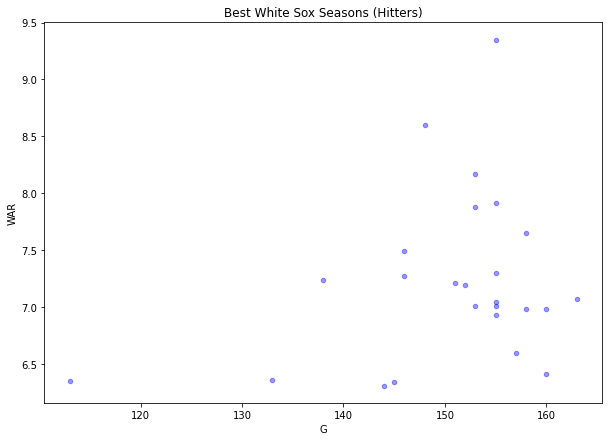

In [56]:
fig, ax = plt.subplots(figsize=(10,7))
best_chw_seasons.plot(kind='scatter', x='G', y='WAR', title='Best White Sox Seasons (Hitters)', ax=ax, alpha=0.4, color='b')

For height/weight info, see People.csv in http://www.seanlahman.com/baseball-archive/statistics/.

In [58]:
player_table=pd.read_csv('People.csv')

In [59]:
player_table.columns

Index(['playerID', 'birthYear', 'birthMonth', 'birthDay', 'birthCountry',
       'birthState', 'birthCity', 'deathYear', 'deathMonth', 'deathDay',
       'deathCountry', 'deathState', 'deathCity', 'nameFirst', 'nameLast',
       'nameGiven', 'weight', 'height', 'bats', 'throws', 'debut', 'finalGame',
       'retroID', 'bbrefID'],
      dtype='object')

In [60]:
player_table=player_table[['playerID','height','weight','nameFirst', 'nameLast','birthYear', 'birthMonth', 'birthDay', 'birthCountry',
       'birthState', 'birthCity', 'deathYear', 'deathMonth', 'deathDay',
       'deathCountry', 'deathState', 'deathCity',
       'nameGiven', 'bats', 'throws', 'debut', 'finalGame',
       'retroID', 'bbrefID']]
player_table.head(2)

,playerID,height,weight,nameFirst,nameLast,birthYear,birthMonth,birthDay,birthCountry,birthState,...,deathCountry,deathState,deathCity,nameGiven,bats,throws,debut,finalGame,retroID,bbrefID
0,aardsda01,75.0,215.0,David,Aardsma,1981.0,12.0,27.0,USA,CO,...,NaN,NaN,NaN,David Allan,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
1,aaronha01,72.0,180.0,Hank,Aaron,1934.0,2.0,5.0,USA,AL,...,USA,NaN,NaN,Henry Louis,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01


In [61]:
#Add some new columns with sample data, which we will change in a moment to reflect the actual values.
player_table.insert(3, 'BMI', 23, True)
player_table.insert(3, 'weight_kg', 80, True)
player_table.insert(3, 'height_m', 1.85, True)

In [62]:
#Converting height from inches to meters, weight from pounds to kilograms, calculating BMI.
player_table['height_m']=player_table['height']*2.54/100
player_table['weight_kg']=player_table['weight']/2.20462
player_table['BMI']=player_table['weight_kg']/player_table['height_m']**2
player_table=player_table.drop(columns=['height','weight'])
player_table.head(2)

,playerID,height_m,weight_kg,BMI,nameFirst,nameLast,birthYear,birthMonth,birthDay,birthCountry,...,deathCountry,deathState,deathCity,nameGiven,bats,throws,debut,finalGame,retroID,bbrefID
0,aardsda01,1.9050,97.522476,26.872914,David,Aardsma,1981.0,12.0,27.0,USA,...,NaN,NaN,NaN,David Allan,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
1,aaronha01,1.8288,81.646724,24.412167,Hank,Aaron,1934.0,2.0,5.0,USA,...,USA,NaN,NaN,Henry Louis,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01


In [78]:
all_batters=batters.merge(player_table, left_on='player_ID',right_on='playerID')

In [79]:
all_pitchers=pitchers.merge(player_table, left_on='player_ID',right_on='playerID')

In [80]:
all_batters.shape

(106922, 74)

In [81]:
all_pitchers.shape

(47993, 68)

In [82]:
#Dropping all rows where OPS_plus is NaN, since a null OPS_plus indicates that the player did not bat that season.
all_batters=all_batters.dropna(subset=['OPS_plus'])
#Dropping all rows where ERA_plus is NaN, since a null ERA_plus indicates that the player did not pitch that season.
all_pitchers=all_pitchers.dropna(subset=['ERA_plus'])

In [83]:
all_batters.shape

(90200, 74)

In [84]:
all_pitchers.shape

(46551, 68)

In [85]:
all_batters.columns

Index(['name_common', 'player_ID', 'mlb_ID', 'WAR', 'G', 'age', 'OPS_plus',
       'year_ID', 'team_ID', 'stint_ID', 'lg_ID', 'PA', 'Inn', 'runs_bat',
       'runs_br', 'runs_dp', 'runs_field', 'runs_infield', 'runs_outfield',
       'runs_catcher', 'runs_good_plays', 'runs_defense', 'runs_position',
       'runs_position_p', 'runs_replacement', 'runs_above_rep',
       'runs_above_avg', 'runs_above_avg_off', 'runs_above_avg_def', 'WAA',
       'WAA_off', 'WAA_def', 'WAR_def', 'WAR_off', 'WAR_rep', 'salary',
       'pitcher', 'teamRpG', 'oppRpG', 'oppRpPA_rep', 'oppRpG_rep',
       'pyth_exponent', 'pyth_exponent_rep', 'waa_win_perc',
       'waa_win_perc_off', 'waa_win_perc_def', 'waa_win_perc_rep', 'TOB_lg',
       'TB_lg', 'playerID', 'height_m', 'weight_kg', 'BMI', 'nameFirst',
       'nameLast', 'birthYear', 'birthMonth', 'birthDay', 'birthCountry',
       'birthState', 'birthCity', 'deathYear', 'deathMonth', 'deathDay',
       'deathCountry', 'deathState', 'deathCity', 'nameGiven

In [86]:
all_pitchers.columns

Index(['name_common', 'player_ID', 'mlb_ID', 'WAR', 'G', 'age', 'year_ID',
       'ERA_plus', 'ER_lg', 'RA', 'xRA', 'BIP', 'team_ID', 'stint_ID', 'lg_ID',
       'GS', 'IPouts', 'IPouts_start', 'IPouts_relief', 'xRA_sprp_adj',
       'xRA_extras_adj', 'xRA_def_pitcher', 'PPF', 'PPF_custom', 'xRA_final',
       'BIP_perc', 'RS_def_total', 'runs_above_avg', 'runs_above_avg_adj',
       'runs_above_rep', 'RpO_replacement', 'GR_leverage_index_avg', 'salary',
       'teamRpG', 'oppRpG', 'pyth_exponent', 'waa_win_perc', 'WAA', 'WAA_adj',
       'oppRpG_rep', 'pyth_exponent_rep', 'waa_win_perc_rep', 'WAR_rep',
       'playerID', 'height_m', 'weight_kg', 'BMI', 'nameFirst', 'nameLast',
       'birthYear', 'birthMonth', 'birthDay', 'birthCountry', 'birthState',
       'birthCity', 'deathYear', 'deathMonth', 'deathDay', 'deathCountry',
       'deathState', 'deathCity', 'nameGiven', 'bats', 'throws', 'debut',
       'finalGame', 'retroID', 'bbrefID'],
      dtype='object')

Consider creating WAR after age 30, WAR after age 35 columns.

On a related note, consider creating dataframes for pitchers and hitters that are a groupby of the players. That way, we can view career WAR totals instead of having everything split up by season.

We also will want the traditional stats like BA, OBP, SLG, ERA, W, SV, etc. in the combined table. Merge those earlier tables. Please bear in mind that there is only data from 2008 onward for those stats.

In [87]:
all_pitchers.head(2)

,name_common,player_ID,mlb_ID,WAR,G,age,year_ID,ERA_plus,ER_lg,RA,...,deathCountry,deathState,deathCity,nameGiven,bats,throws,debut,finalGame,retroID,bbrefID
0,David Aardsma,aardsda01,430911.0,-0.15,11,22.0,2004,66.675000,5.334,8,...,NaN,NaN,NaN,David Allan,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
1,David Aardsma,aardsda01,430911.0,0.61,45,24.0,2006,114.295833,27.431,25,...,NaN,NaN,NaN,David Allan,R,R,2004-04-06,2015-08-23,aardd001,aardsda01


In [88]:
all_batters.head(2)

,name_common,player_ID,mlb_ID,WAR,G,age,OPS_plus,year_ID,team_ID,stint_ID,...,deathCountry,deathState,deathCity,nameGiven,bats,throws,debut,finalGame,retroID,bbrefID
1,David Aardsma,aardsda01,430911.0,-0.04,43,24.0,-100.0,2006,CHC,1,...,NaN,NaN,NaN,David Allan,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
3,David Aardsma,aardsda01,430911.0,-0.02,5,26.0,-100.0,2008,BOS,1,...,NaN,NaN,NaN,David Allan,R,R,2004-04-06,2015-08-23,aardd001,aardsda01


In [146]:
career_batters = all_batters.groupby(['player_ID']).sum()
career_pitchers = all_pitchers.groupby(['player_ID']).sum()

In [149]:
career_batters.columns

Index(['mlb_ID', 'WAR', 'G', 'age', 'OPS_plus', 'year_ID', 'stint_ID', 'PA',
       'Inn', 'runs_bat', 'runs_br', 'runs_dp', 'runs_field', 'runs_infield',
       'runs_outfield', 'runs_catcher', 'runs_good_plays', 'runs_defense',
       'runs_position', 'runs_position_p', 'runs_replacement',
       'runs_above_rep', 'runs_above_avg', 'runs_above_avg_off',
       'runs_above_avg_def', 'WAA', 'WAA_off', 'WAA_def', 'WAR_def', 'WAR_off',
       'WAR_rep', 'salary', 'teamRpG', 'oppRpG', 'oppRpPA_rep', 'oppRpG_rep',
       'pyth_exponent', 'pyth_exponent_rep', 'waa_win_perc',
       'waa_win_perc_off', 'waa_win_perc_def', 'waa_win_perc_rep', 'TOB_lg',
       'TB_lg', 'height_m', 'weight_kg', 'BMI', 'birthYear', 'birthMonth',
       'birthDay', 'deathYear', 'deathMonth', 'deathDay'],
      dtype='object')

In [150]:
career_pitchers.columns

Index(['mlb_ID', 'WAR', 'G', 'age', 'year_ID', 'ERA_plus', 'ER_lg', 'RA',
       'xRA', 'BIP', 'stint_ID', 'GS', 'IPouts', 'IPouts_start',
       'IPouts_relief', 'xRA_sprp_adj', 'xRA_extras_adj', 'xRA_def_pitcher',
       'PPF', 'PPF_custom', 'xRA_final', 'BIP_perc', 'RS_def_total',
       'runs_above_avg', 'runs_above_avg_adj', 'runs_above_rep',
       'RpO_replacement', 'GR_leverage_index_avg', 'salary', 'teamRpG',
       'oppRpG', 'pyth_exponent', 'waa_win_perc', 'WAA', 'WAA_adj',
       'oppRpG_rep', 'pyth_exponent_rep', 'waa_win_perc_rep', 'WAR_rep',
       'height_m', 'weight_kg', 'BMI', 'birthYear', 'birthMonth', 'birthDay',
       'deathYear', 'deathMonth', 'deathDay'],
      dtype='object')

In [328]:
career_batters.head(10)

,mlb_ID,WAR,G,age,OPS_plus,year_ID,stint_ID,PA,Inn,runs_bat,...,TB_lg,height_m,weight_kg,BMI,birthYear,birthMonth,birthDay,deathYear,deathMonth,deathDay
player_ID,,,,,,,,,,,,,,,,,,,,,
aardsda01,1292733,-0.07,78,83.0,-300.0000,6029,3,5,132.4,-1.45,...,1.734,5.7150,292.567427,80.618741,5943.0,36.0,81.0,0.0,0.0,0.0
aaronha01,2530023,143.10,3298,713.0,3511.6204,45195,23,13941,27946.6,878.13,...,4875.029,42.0624,1877.874645,561.479846,44482.0,46.0,115.0,46483.0,23.0,506.0
aaronto01,770014,-2.81,437,188.0,425.9241,13768,7,1045,2158.3,-28.77,...,363.363,13.3350,603.278570,166.237094,13573.0,56.0,35.0,13888.0,56.0,112.0
aasedo01,110003,-0.07,49,34.0,-100.0000,1989,1,5,59.3,-1.19,...,1.848,1.9050,86.182653,23.748156,1954.0,9.0,8.0,0.0,0.0,0.0
abadan01,1222731,-0.37,15,91.0,-96.4947,6010,3,25,46.0,-3.45,...,9.217,5.5626,250.383286,72.826960,5916.0,24.0,75.0,0.0,0.0,0.0
abadfe01,1417653,-0.08,60,80.0,-221.7251,6038,3,9,99.0,-1.77,...,3.727,5.6388,319.783001,90.515822,5955.0,36.0,51.0,0.0,0.0,0.0
abadijo01,220008,-0.06,12,48.0,142.8242,3750,3,49,0.0,-1.78,...,14.955,3.6576,174.179677,52.079290,3700.0,22.0,8.0,3810.0,10.0,34.0
abbated01,1100050,8.61,855,281.0,714.7286,19051,11,3467,0.0,-0.79,...,1017.962,18.0340,771.107946,237.099724,18770.0,40.0,150.0,19570.0,10.0,60.0
abbeybe01,660036,-1.01,79,145.0,221.9474,11365,7,252,0.0,-30.27,...,86.029,10.8204,476.272555,146.443947,11214.0,66.0,66.0,11772.0,36.0,66.0


In [329]:
career_batters['mlb_ID']=career_batters['mlb_ID'].astype(int)

In [330]:
career_pitchers.head(10)

,mlb_ID,WAR,G,age,year_ID,ERA_plus,ER_lg,RA,xRA,BIP,...,WAR_rep,height_m,weight_kg,BMI,birthYear,birthMonth,birthDay,deathYear,deathMonth,deathDay
player_ID,,,,,,,,,,,,,,,,,,,,,
aardsda01,3878199,1.85,331,246.0,18084,852.699325,160.299,169,175.698,934,...,3.3778,17.1450,877.702280,241.856223,17829.0,108.0,243.0,0.0,0.0,0.0
aasedo01,1430039,15.09,448,371.0,25786,1645.607511,485.570,503,546.867,3556,...,10.7478,24.7650,1120.374486,308.726031,25402.0,117.0,104.0,0.0,0.0,0.0
abadfe01,4725510,3.27,384,283.0,20143,1196.231257,149.253,143,163.267,991,...,3.2025,18.7960,1065.943337,301.719408,19850.0,120.0,170.0,0.0,0.0,0.0
abbeybe01,660036,1.32,79,145.0,11365,591.551569,263.774,442,382.980,2197,...,5.4363,10.8204,476.272555,146.443947,11214.0,66.0,66.0,11772.0,36.0,66.0
abbeych01,110007,-0.09,1,29.0,1896,114.800000,1.148,3,1.339,12,...,0.0201,1.7272,76.657202,25.696129,1866.0,10.0,14.0,1926.0,4.0,27.0
abbotda01,110013,-0.37,3,28.0,1890,65.755555,5.918,14,8.097,58,...,0.0891,1.8034,86.182653,26.499381,1862.0,3.0,16.0,1930.0,2.0,13.0
abbotgl01,1320192,5.26,248,331.0,23743,1168.395598,564.009,707,622.483,4510,...,12.4778,23.7744,1088.622983,277.345332,23412.0,24.0,192.0,0.0,0.0,0.0
abbotji01,1210099,19.70,263,284.0,21932,1142.359688,786.211,880,881.969,5670,...,16.6672,20.9550,997.904401,274.978651,21637.0,99.0,209.0,0.0,0.0,0.0
abbotky01,440048,-1.37,57,102.0,7974,297.223479,76.976,112,84.254,610,...,1.5864,7.7216,362.874328,97.378174,7872.0,8.0,72.0,0.0,0.0,0.0


In [331]:
career_pitchers['mlb_ID']=career_pitchers['mlb_ID'].astype(int)

As these are sums, many of these columns' values do not make sense, like mlb_ID and age. However, stint_ID now makes sense, as it tells us how many seasons the player played. There is a caveat, however. stint_ID is inaccurate if a player played for multiple teams in a single season. We can fix that.

Before we make any big changes to either of the big dataframes with every batter and pitcher, let's create a practice dataframe with only players named Frank Thomas.

In [277]:
frank_thomas=batters[batters.name_common=='Frank Thomas']
frank_thomas.sort_values(['WAR'], ascending=[False]).head(1)

,name_common,player_ID,mlb_ID,WAR,G,age,OPS_plus,year_ID,team_ID,stint_ID,...,oppRpPA_rep,oppRpG_rep,pyth_exponent,pyth_exponent_rep,waa_win_perc,waa_win_perc_off,waa_win_perc_def,waa_win_perc_rep,TOB_lg,TB_lg
96711,Frank Thomas,thomafr04,123245.0,7.27,146,29.0,181.1266,1997,CHW,1,...,0.08613,4.79852,1.944,1.914,0.5336,0.536,0.4911,0.484,217.61,223.289


In [278]:
#Testing out new columns with practice dataframe. Values will be corrected later on by calculations.
frank_thomas.insert(3, 'min_age', 20, True)
frank_thomas.insert(3, 'max_age', 30, True)
frank_thomas=frank_thomas[['player_ID','name_common','WAR','year_ID','age','min_age','max_age','G',
       'team_ID', 'stint_ID', 'lg_ID', 'PA', 'Inn', 'runs_bat',
       'runs_br', 'runs_dp', 'runs_field', 'runs_infield', 'runs_outfield',
       'runs_catcher', 'runs_good_plays', 'runs_defense', 'runs_position',
       'runs_position_p', 'runs_replacement', 'runs_above_rep',
       'runs_above_avg', 'runs_above_avg_off', 'runs_above_avg_def', 'WAA',
       'WAA_off', 'WAA_def', 'WAR_def', 'WAR_off', 'WAR_rep', 'salary',
       'pitcher', 'teamRpG', 'oppRpG', 'oppRpPA_rep', 'oppRpG_rep',
       'pyth_exponent', 'pyth_exponent_rep', 'waa_win_perc',
       'waa_win_perc_off', 'waa_win_perc_def', 'waa_win_perc_rep', 'TOB_lg',
       'TB_lg','OPS_plus','mlb_ID']]

The most well-known Frank Thomas (thomafr04) played from 1990-2008, which is 19 seasons, not 21. So, stint_ID is slightly off because of his 2008 season, when he played for two teams. stint_ID is, as it stands now, not very useful, but we can change it to be useful.

The min_age for thomafr04 is 22, the max_age is 40. Calculate the columns to reflect the true values. stint_ID counts multiple values for a single season if a player played for multiple teams during that season. We can make this column useful by changing values greater than 1 to 0 so that every season counts for only 1 value. That way, when we sum it, we will get the true amount of seasons the player played.

In [279]:
frank_thomas['min_age'] = frank_thomas.groupby('player_ID')['age'].transform('min')
frank_thomas['max_age'] = frank_thomas.groupby('player_ID')['age'].transform('max')
frank_thomas.loc[frank_thomas['stint_ID']>1, 'stint_ID']=0
frank_thomas.rename(columns = {'stint_ID':'seasons'}, inplace = True)
frank_thomas

,player_ID,name_common,WAR,year_ID,age,min_age,max_age,G,team_ID,seasons,...,pyth_exponent,pyth_exponent_rep,waa_win_perc,waa_win_perc_off,waa_win_perc_def,waa_win_perc_rep,TOB_lg,TB_lg,OPS_plus,mlb_ID
96684,thomafr03,Frank Thomas,0.26,1951,22.0,22.0,37.0,39,PIT,1,...,1.861,1.856,0.4918,0.4918,0.4995,0.4839,54.024,60.488,84.7362,123246.0
96685,thomafr03,Frank Thomas,-0.41,1952,23.0,22.0,37.0,6,PIT,1,...,1.788,1.825,0.4178,0.4178,0.4996,0.4847,7.416,8.245,-35.2898,123246.0
96686,thomafr03,Frank Thomas,2.46,1953,24.0,22.0,37.0,128,PIT,1,...,1.912,1.900,0.5055,0.5052,0.4989,0.4850,174.357,193.420,115.2662,123246.0
96687,thomafr03,Frank Thomas,3.73,1954,25.0,22.0,37.0,153,PIT,1,...,1.886,1.870,0.5095,0.5114,0.4962,0.4833,222.412,242.282,123.2175,123246.0
96688,thomafr03,Frank Thomas,0.36,1955,26.0,22.0,37.0,142,PIT,1,...,1.875,1.868,0.4890,0.4965,0.4894,0.4840,192.879,212.466,100.4980,123246.0
96689,thomafr03,Frank Thomas,2.00,1956,27.0,22.0,37.0,157,PIT,1,...,1.844,1.834,0.4993,0.5012,0.4970,0.4833,207.582,241.786,111.8022,123246.0
96690,thomafr03,Frank Thomas,2.43,1957,28.0,22.0,37.0,151,PIT,1,...,1.852,1.841,0.5011,0.5020,0.4945,0.4824,214.119,243.659,114.3214,123246.0
96691,thomafr03,Frank Thomas,2.95,1958,29.0,22.0,37.0,149,PIT,1,...,1.866,1.850,0.5046,0.5123,0.4933,0.4832,207.303,234.579,126.4636,123246.0
96692,thomafr03,Frank Thomas,-1.69,1959,30.0,22.0,37.0,108,CIN,1,...,1.849,1.854,0.4695,0.4757,0.4925,0.4847,139.523,158.277,71.4231,123246.0
96693,thomafr03,Frank Thomas,-0.56,1960,31.0,22.0,37.0,135,CHC,1,...,1.831,1.829,0.4819,0.4880,0.4901,0.4844,165.760,191.696,85.3029,123246.0


In [280]:
frank_thomas.loc[frank_thomas['seasons']==0, 'age']=0
frank_thomas.loc[frank_thomas['seasons']==0, 'min_age']=0
frank_thomas.loc[frank_thomas['seasons']==0, 'max_age']=0
frank_thomas.loc[frank_thomas['seasons']==0, 'year_ID']=0
frank_thomas.loc[frank_thomas['seasons']==0, 'mlb_ID']=0

In [281]:
frank_thomas_sums = frank_thomas.groupby(['player_ID']).sum()
frank_thomas_sums['age']=frank_thomas_sums['age']/frank_thomas_sums['seasons']
frank_thomas_sums['min_age']=frank_thomas_sums['min_age']/frank_thomas_sums['seasons']
frank_thomas_sums['max_age']=frank_thomas_sums['max_age']/frank_thomas_sums['seasons']
frank_thomas_sums['mlb_ID']=frank_thomas_sums['mlb_ID']/frank_thomas_sums['seasons']
frank_thomas_sums

,WAR,year_ID,age,min_age,max_age,G,seasons,PA,Inn,runs_bat,...,pyth_exponent,pyth_exponent_rep,waa_win_perc,waa_win_perc_off,waa_win_perc_def,waa_win_perc_rep,TOB_lg,TB_lg,OPS_plus,mlb_ID
player_ID,,,,,,,,,,,,,,,,,,,,,
thomafr03,18.56,31336,29.5,22.0,37.0,1766,16,6915,13688.6,67.56,...,36.798,36.736,9.7877,9.8133,9.9136,9.7098,2285.726,2571.671,1645.0851,123246.0
thomafr04,73.82,37981,31.0,22.0,40.0,2322,19,10075,20173.3,690.78,...,38.457,38.110,10.2442,10.2916,9.8016,9.6892,3395.944,3456.836,2960.6479,123245.0


Still some adjusting to do with column names and calculations. We will work on those in the following cell.

In [282]:
#avg_yr and avg_age might be unnecessary, but we will keep them in for now.
#When we ran the previous cell, age actually was the average age of the player during his career.
#Change the name to reflect that. A couple of adjustments to make for the year_ID columns. That will only
#be useful if we divide it by the number of seasons the player played and rename it appropriately.
frank_thomas_sums.rename(columns = {'age':'avg_age'}, inplace = True)
frank_thomas_sums.rename(columns = {'year_ID':'avg_yr'}, inplace = True)
frank_thomas_sums['OPS_plus']=frank_thomas_sums['OPS_plus']/frank_thomas_sums['seasons']
frank_thomas_sums['avg_yr']=frank_thomas_sums['avg_yr']/frank_thomas_sums['seasons']
#Even though we have player_ID as a unique identifier for players, mlb_ID is necessary
#if we want to combine this table with the one with the traditional statistics. Leave it in.
frank_thomas_sums

,WAR,avg_yr,avg_age,min_age,max_age,G,seasons,PA,Inn,runs_bat,...,pyth_exponent,pyth_exponent_rep,waa_win_perc,waa_win_perc_off,waa_win_perc_def,waa_win_perc_rep,TOB_lg,TB_lg,OPS_plus,mlb_ID
player_ID,,,,,,,,,,,,,,,,,,,,,
thomafr03,18.56,1958.5,29.5,22.0,37.0,1766,16,6915,13688.6,67.56,...,36.798,36.736,9.7877,9.8133,9.9136,9.7098,2285.726,2571.671,102.817819,123246.0
thomafr04,73.82,1999.0,31.0,22.0,40.0,2322,19,10075,20173.3,690.78,...,38.457,38.110,10.2442,10.2916,9.8016,9.6892,3395.944,3456.836,155.823574,123245.0


In [283]:
frank_thomas_sums.columns

Index(['WAR', 'avg_yr', 'avg_age', 'min_age', 'max_age', 'G', 'seasons', 'PA',
       'Inn', 'runs_bat', 'runs_br', 'runs_dp', 'runs_field', 'runs_infield',
       'runs_outfield', 'runs_catcher', 'runs_good_plays', 'runs_defense',
       'runs_position', 'runs_position_p', 'runs_replacement',
       'runs_above_rep', 'runs_above_avg', 'runs_above_avg_off',
       'runs_above_avg_def', 'WAA', 'WAA_off', 'WAA_def', 'WAR_def', 'WAR_off',
       'WAR_rep', 'salary', 'teamRpG', 'oppRpG', 'oppRpPA_rep', 'oppRpG_rep',
       'pyth_exponent', 'pyth_exponent_rep', 'waa_win_perc',
       'waa_win_perc_off', 'waa_win_perc_def', 'waa_win_perc_rep', 'TOB_lg',
       'TB_lg', 'OPS_plus', 'mlb_ID'],
      dtype='object')

There are some confounding variables here, like runs_bat and runs_position, since those are used to calculate WAR directly. We need to describe what determines those, which in turn determines WAR.

Remember: We will want to combine this with the traditional stats, height, weight, BMI, etc. Let's try with a more recent player than those two Frank Thomases.

In [311]:
eloy=batters[batters.name_common=='Eloy Jimenez']
eloy.sort_values(['WAR'], ascending=[False]).head(1)

,name_common,player_ID,mlb_ID,WAR,G,age,OPS_plus,year_ID,team_ID,stint_ID,...,oppRpPA_rep,oppRpG_rep,pyth_exponent,pyth_exponent_rep,waa_win_perc,waa_win_perc_off,waa_win_perc_def,waa_win_perc_rep,TOB_lg,TB_lg
47938,Eloy Jimenez,jimenel02,650391.0,1.45,122,22.0,115.9673,2019,CHW,1,...,0.09007,4.80804,1.926,1.914,0.4964,0.5051,0.4872,0.4855,161.582,204.142


In [312]:
#Testing out new columns with practice dataframe. Values will be corrected later on by calculations.
eloy.insert(3, 'min_age', 20, True)
eloy.insert(3, 'max_age', 30, True)
eloy=eloy[['player_ID','name_common','WAR','year_ID','age','min_age','max_age','mlb_ID',
       'team_ID', 'stint_ID', 'lg_ID', 'PA', 'Inn', 'runs_bat',
       'runs_br', 'runs_dp', 'runs_field', 'runs_infield', 'runs_outfield',
       'runs_catcher', 'runs_good_plays', 'runs_defense', 'runs_position',
       'runs_position_p', 'runs_replacement', 'runs_above_rep',
       'runs_above_avg', 'runs_above_avg_off', 'runs_above_avg_def', 'WAA',
       'WAA_off', 'WAA_def', 'WAR_def', 'WAR_off', 'WAR_rep', 'salary',
       'pitcher', 'teamRpG', 'oppRpG', 'oppRpPA_rep', 'oppRpG_rep',
       'pyth_exponent', 'pyth_exponent_rep', 'waa_win_perc',
       'waa_win_perc_off', 'waa_win_perc_def', 'waa_win_perc_rep', 'TOB_lg',
       'TB_lg','OPS_plus','G']]

In [313]:
eloy['min_age'] = eloy.groupby('player_ID')['age'].transform('min')
eloy['max_age'] = eloy.groupby('player_ID')['age'].transform('max')
eloy.loc[eloy['stint_ID']>1, 'stint_ID']=0
eloy.rename(columns = {'stint_ID':'seasons'}, inplace = True)
eloy

,player_ID,name_common,WAR,year_ID,age,min_age,max_age,mlb_ID,team_ID,seasons,...,pyth_exponent,pyth_exponent_rep,waa_win_perc,waa_win_perc_off,waa_win_perc_def,waa_win_perc_rep,TOB_lg,TB_lg,OPS_plus,G
47938,jimenel02,Eloy Jimenez,1.45,2019,22.0,22.0,23.0,650391.0,CHW,1,...,1.926,1.914,0.4964,0.5051,0.4872,0.4855,161.582,204.142,115.9673,122
47939,jimenel02,Eloy Jimenez,1.38,2020,23.0,22.0,23.0,650391.0,CHW,1,...,1.913,1.894,0.5115,0.5187,0.4897,0.4859,71.687,87.841,140.0935,55


In [314]:
#Eloy Jimenez has only played for one team, so this cell is unnecessary for him,
#but it will be necessary for many players.
#eloy.loc[eloy['seasons']==0, 'age']=0
#eloy.loc[eloy['seasons']==0, 'min_age']=0
#eloy.loc[eloy['seasons']==0, 'max_age']=0
#eloy.loc[eloy['seasons']==0, 'year_ID']=0
#eloy.loc[eloy['seasons']==0, 'mlb_ID']=0

In [315]:
eloy_sums = eloy.groupby(['player_ID']).sum()
eloy_sums['age']=eloy_sums['age']/eloy_sums['seasons']
eloy_sums['min_age']=eloy_sums['min_age']/eloy_sums['seasons']
eloy_sums['max_age']=eloy_sums['max_age']/eloy_sums['seasons']
eloy_sums['mlb_ID']=eloy_sums['mlb_ID']/eloy_sums['seasons']
eloy_sums

,WAR,year_ID,age,min_age,max_age,mlb_ID,seasons,PA,Inn,runs_bat,...,pyth_exponent,pyth_exponent_rep,waa_win_perc,waa_win_perc_off,waa_win_perc_def,waa_win_perc_rep,TOB_lg,TB_lg,OPS_plus,G
player_ID,,,,,,,,,,,,,,,,,,,,,
jimenel02,2.83,4039,22.5,22.0,23.0,650391.0,2,730,1502.4,22.27,...,3.839,3.808,1.0079,1.0238,0.9769,0.9714,233.269,291.983,256.0608,177


In [316]:
eloy_sums.rename(columns = {'age':'avg_age'}, inplace = True)
eloy_sums.rename(columns = {'year_ID':'avg_yr'}, inplace = True)
eloy_sums['OPS_plus']=eloy_sums['OPS_plus']/eloy_sums['seasons']
eloy_sums['avg_yr']=eloy_sums['avg_yr']/eloy_sums['seasons']
eloy_sums

,WAR,avg_yr,avg_age,min_age,max_age,mlb_ID,seasons,PA,Inn,runs_bat,...,pyth_exponent,pyth_exponent_rep,waa_win_perc,waa_win_perc_off,waa_win_perc_def,waa_win_perc_rep,TOB_lg,TB_lg,OPS_plus,G
player_ID,,,,,,,,,,,,,,,,,,,,,
jimenel02,2.83,2019.5,22.5,22.0,23.0,650391.0,2,730,1502.4,22.27,...,3.839,3.808,1.0079,1.0238,0.9769,0.9714,233.269,291.983,128.0304,177


In [317]:
eloy_batting_data=batting_data[batting_data.mlb_ID==650391]
eloy_batting_data

,Name,Age,#days,Lev,Tm,G,PA,AB,R,H,...,SH,SF,GDP,SB,CS,BA,OBP,SLG,OPS,mlb_ID
1536,Eloy Jimenez,23,134,MLB-AL,Chicago,177,730,681,95,188,...,0,3,15,0,0,0.276,0.321,0.527,0.848,650391


eloy_batting_data has the sums of traditional stats we are interested in merging to eloy_sums.

In [318]:
eloy_sums['mlb_ID']=eloy_sums['mlb_ID'].astype(int)

In [319]:
eloy_sums=eloy_sums.merge(eloy_batting_data, left_on='mlb_ID',right_on='mlb_ID')
eloy_sums

,WAR,avg_yr,avg_age,min_age,max_age,mlb_ID,seasons,PA_x,Inn,runs_bat,...,HBP,SH,SF,GDP,SB,CS,BA,OBP,SLG,OPS
0,2.83,2019.5,22.5,22.0,23.0,650391,2,730,1502.4,22.27,...,4,0,3,15,0,0,0.276,0.321,0.527,0.848


In [320]:
eloy_sums.columns

Index(['WAR', 'avg_yr', 'avg_age', 'min_age', 'max_age', 'mlb_ID', 'seasons',
       'PA_x', 'Inn', 'runs_bat', 'runs_br', 'runs_dp', 'runs_field',
       'runs_infield', 'runs_outfield', 'runs_catcher', 'runs_good_plays',
       'runs_defense', 'runs_position', 'runs_position_p', 'runs_replacement',
       'runs_above_rep', 'runs_above_avg', 'runs_above_avg_off',
       'runs_above_avg_def', 'WAA', 'WAA_off', 'WAA_def', 'WAR_def', 'WAR_off',
       'WAR_rep', 'salary', 'teamRpG', 'oppRpG', 'oppRpPA_rep', 'oppRpG_rep',
       'pyth_exponent', 'pyth_exponent_rep', 'waa_win_perc',
       'waa_win_perc_off', 'waa_win_perc_def', 'waa_win_perc_rep', 'TOB_lg',
       'TB_lg', 'OPS_plus', 'G_x', 'Name', 'Age', '#days', 'Lev', 'Tm', 'G_y',
       'PA_y', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'BB', 'IBB', 'SO',
       'HBP', 'SH', 'SF', 'GDP', 'SB', 'CS', 'BA', 'OBP', 'SLG', 'OPS'],
      dtype='object')

In [321]:
eloy_sums=eloy_sums.drop(columns=['G_y','Tm','PA_y','runs_bat', 'runs_br', 'runs_dp', 'runs_field',
       'runs_infield', 'runs_outfield', 'runs_catcher', 'runs_good_plays',
       'runs_defense', 'runs_position', 'runs_position_p', 'runs_replacement',
       'runs_above_rep', 'runs_above_avg', 'runs_above_avg_off',
       'runs_above_avg_def', 'WAA', 'WAA_off', 'WAA_def', 'WAR_def', 'WAR_off',
       'WAR_rep', 'salary','Inn'])

In [352]:
eloy_career=career_batters[career_batters.mlb_ID==1300782]
eloy_career

,mlb_ID,WAR,G,age,OPS_plus,year_ID,stint_ID,PA,Inn,runs_bat,...,TB_lg,height_m,weight_kg,BMI,birthYear,birthMonth,birthDay,deathYear,deathMonth,deathDay
player_ID,,,,,,,,,,,,,,,,,,,,,
jimenel02,1300782,2.83,177,45.0,256.0608,4039,2,730,1502.4,22.27,...,291.983,3.8608,213.188667,57.209677,3992.0,22.0,54.0,0.0,0.0,0.0


This did not work perfectly because Eloy Jimenez has played two seasons, so it double-counted his mlb_ID (650391*2=1300782). To avoid the issue of unwanted summing of mlb_ID and various other columns, we will need to make some changes. In this case, I hard-coded his mlb_ID because I need it to be correct for the testing I am about to do, but of course, I will not be hard-coding the mlb_ID for all players.

In [356]:
eloy_career['mlb_ID']=eloy_career['mlb_ID']=650391

<ipython-input-356-0389c84dd564>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eloy_career['mlb_ID']=eloy_career['mlb_ID']=650391


Potential takeaway for later on: If win probability/win_perc is unpredictable/statistically insignificant, it is important to not overvalue players with situational hits in the past season(s).

In [322]:
eloy_sums.rename(columns = {'G_x':'G'}, inplace = True)
eloy_sums.rename(columns = {'PA_x':'PA'}, inplace = True)
eloy_sums.columns

Index(['WAR', 'avg_yr', 'avg_age', 'min_age', 'max_age', 'mlb_ID', 'seasons',
       'PA', 'teamRpG', 'oppRpG', 'oppRpPA_rep', 'oppRpG_rep', 'pyth_exponent',
       'pyth_exponent_rep', 'waa_win_perc', 'waa_win_perc_off',
       'waa_win_perc_def', 'waa_win_perc_rep', 'TOB_lg', 'TB_lg', 'OPS_plus',
       'G', 'Name', 'Age', '#days', 'Lev', 'AB', 'R', 'H', '2B', '3B', 'HR',
       'RBI', 'BB', 'IBB', 'SO', 'HBP', 'SH', 'SF', 'GDP', 'SB', 'CS', 'BA',
       'OBP', 'SLG', 'OPS'],
      dtype='object')

In [357]:
eloy_sums

,WAR,avg_yr,avg_age,min_age,max_age,mlb_ID,seasons,PA,teamRpG,oppRpG,...,HBP,SH,SF,GDP,SB,CS,BA,OBP,SLG,OPS
0,2.83,2019.5,22.5,22.0,23.0,650391,2,730,9.97473,9.73162,...,4,0,3,15,0,0,0.276,0.321,0.527,0.848


In [358]:
eloy_career

,mlb_ID,WAR,G,age,OPS_plus,year_ID,stint_ID,PA,Inn,runs_bat,...,TB_lg,height_m,weight_kg,BMI,birthYear,birthMonth,birthDay,deathYear,deathMonth,deathDay
player_ID,,,,,,,,,,,,,,,,,,,,,
jimenel02,650391,2.83,177,45.0,256.0608,4039,2,730,1502.4,22.27,...,291.983,3.8608,213.188667,57.209677,3992.0,22.0,54.0,0.0,0.0,0.0


In [410]:
eloy=eloy_sums.merge(eloy_career, left_on='mlb_ID',right_on='mlb_ID')
eloy

,WAR_x,avg_yr,avg_age,min_age,max_age,mlb_ID,seasons,PA_x,teamRpG_x,oppRpG_x,...,TB_lg_y,height_m,weight_kg,BMI,birthYear,birthMonth,birthDay,deathYear,deathMonth,deathDay
0,2.83,2019.5,22.5,22.0,23.0,650391,2,730,9.97473,9.73162,...,291.983,3.8608,213.188667,57.209677,3992.0,22.0,54.0,0.0,0.0,0.0


In [411]:
eloy.columns

Index(['WAR_x', 'avg_yr', 'avg_age', 'min_age', 'max_age', 'mlb_ID', 'seasons',
       'PA_x', 'teamRpG_x', 'oppRpG_x', 'oppRpPA_rep_x', 'oppRpG_rep_x',
       'pyth_exponent_x', 'pyth_exponent_rep_x', 'waa_win_perc_x',
       'waa_win_perc_off_x', 'waa_win_perc_def_x', 'waa_win_perc_rep_x',
       'TOB_lg_x', 'TB_lg_x', 'OPS_plus_x', 'G_x', 'Name', 'Age', '#days',
       'Lev', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'BB', 'IBB', 'SO',
       'HBP', 'SH', 'SF', 'GDP', 'SB', 'CS', 'BA', 'OBP', 'SLG', 'OPS',
       'WAR_y', 'G_y', 'age', 'OPS_plus_y', 'year_ID', 'stint_ID', 'PA_y',
       'Inn', 'runs_bat', 'runs_br', 'runs_dp', 'runs_field', 'runs_infield',
       'runs_outfield', 'runs_catcher', 'runs_good_plays', 'runs_defense',
       'runs_position', 'runs_position_p', 'runs_replacement',
       'runs_above_rep', 'runs_above_avg', 'runs_above_avg_off',
       'runs_above_avg_def', 'WAA', 'WAA_off', 'WAA_def', 'WAR_def', 'WAR_off',
       'WAR_rep', 'salary', 'teamRpG_y', 'oppRpG_y

In [412]:
eloy=eloy.drop(columns=['WAR_y','G_y','OPS_plus_y','PA_y','teamRpG_y','oppRpG_y','oppRpPA_rep_y','oppRpG_rep_y', 'pyth_exponent_y', 'pyth_exponent_rep_y',
       'waa_win_perc_y', 'waa_win_perc_off_y', 'waa_win_perc_def_y',
       'waa_win_perc_rep_y', 'TOB_lg_y', 'TB_lg_y'])

In [413]:
eloy

,WAR_x,avg_yr,avg_age,min_age,max_age,mlb_ID,seasons,PA_x,teamRpG_x,oppRpG_x,...,salary,height_m,weight_kg,BMI,birthYear,birthMonth,birthDay,deathYear,deathMonth,deathDay
0,2.83,2019.5,22.5,22.0,23.0,650391,2,730,9.97473,9.73162,...,4166666.0,3.8608,213.188667,57.209677,3992.0,22.0,54.0,0.0,0.0,0.0


In [414]:
eloy=eloy.drop(columns=['birthYear', 'birthMonth', 'birthDay', 'deathYear', 'deathMonth',
       'deathDay','Inn', 'runs_bat', 'runs_br', 'runs_dp',
       'runs_field', 'runs_infield', 'runs_outfield', 'runs_catcher',
       'runs_good_plays', 'runs_defense', 'runs_position', 'runs_position_p',
       'runs_replacement', 'runs_above_rep', 'runs_above_avg',
       'runs_above_avg_off', 'runs_above_avg_def', 'WAA', 'WAA_off', 'WAA_def',
       'WAR_def', 'WAR_off', 'WAR_rep','salary'])

In [415]:
eloy=eloy.drop(columns=['TOB_lg_x','TB_lg_x','Lev','teamRpG_x', 'oppRpG_x', 'oppRpPA_rep_x', 'oppRpG_rep_x',
       'pyth_exponent_x', 'pyth_exponent_rep_x'])

In [416]:
eloy=eloy.drop(columns=['age', 'stint_ID'])

In [417]:
eloy=eloy.drop(columns=['#days', 'IBB'])

In [418]:
eloy=eloy.drop(columns=['year_ID'])

In [419]:
eloy=eloy.drop(columns=['avg_yr','avg_age'])

In [420]:
eloy

,WAR_x,min_age,max_age,mlb_ID,seasons,PA_x,waa_win_perc_x,waa_win_perc_off_x,waa_win_perc_def_x,waa_win_perc_rep_x,...,GDP,SB,CS,BA,OBP,SLG,OPS,height_m,weight_kg,BMI
0,2.83,22.0,23.0,650391,2,730,1.0079,1.0238,0.9769,0.9714,...,15,0,0,0.276,0.321,0.527,0.848,3.8608,213.188667,57.209677


In [421]:
eloy['height_m']=eloy['height_m']/eloy['seasons']
eloy['weight_kg']=eloy['weight_kg']/eloy['seasons']

In [422]:
eloy['BMI']=eloy['weight_kg']/eloy['height_m']**2
eloy

,WAR_x,min_age,max_age,mlb_ID,seasons,PA_x,waa_win_perc_x,waa_win_perc_off_x,waa_win_perc_def_x,waa_win_perc_rep_x,...,GDP,SB,CS,BA,OBP,SLG,OPS,height_m,weight_kg,BMI
0,2.83,22.0,23.0,650391,2,730,1.0079,1.0238,0.9769,0.9714,...,15,0,0,0.276,0.321,0.527,0.848,1.9304,106.594334,28.604839


Now, we have height, weight, and BMI behaving as they should (these should not be summed between individual players' multiple seasons, as they previously were, of course).

Could run two models. One with traditional stats (2008-present) and one without (all-time). Would be an interesting comparison to see which one does better and how traditional stats' values compare.

Scaling of bulk statistics? For example, home runs and OBP are on completely different scales.

Potentially interesting analysis ideas: https://williamkoehrsen.medium.com/data-analysis-with-python-19434f5d6324

We are ready to end the practice dataframes and apply the changes to all players.

In [423]:
career_batters.head(2)

,mlb_ID,WAR,G,age,OPS_plus,year_ID,stint_ID,PA,Inn,runs_bat,...,TB_lg,height_m,weight_kg,BMI,birthYear,birthMonth,birthDay,deathYear,deathMonth,deathDay
player_ID,,,,,,,,,,,,,,,,,,,,,
aardsda01,1292733,-0.07,78,83.0,-300.0000,6029,3,5,132.4,-1.45,...,1.734,5.7150,292.567427,80.618741,5943.0,36.0,81.0,0.0,0.0,0.0
aaronha01,2530023,143.10,3298,713.0,3511.6204,45195,23,13941,27946.6,878.13,...,4875.029,42.0624,1877.874645,561.479846,44482.0,46.0,115.0,46483.0,23.0,506.0


In [428]:
all_batters=all_batters.dropna(subset=['mlb_ID'])
all_pitchers=all_pitchers.dropna(subset=['mlb_ID'])

In [429]:
all_batters['mlb_ID']=all_batters['mlb_ID'].astype(int)
all_pitchers['mlb_ID']=all_pitchers['mlb_ID'].astype(int)

<ipython-input-429-db5345601e04>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_batters['mlb_ID']=all_batters['mlb_ID'].astype(int)
<ipython-input-429-db5345601e04>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_pitchers['mlb_ID']=all_pitchers['mlb_ID'].astype(int)


In [432]:
#Testing out new columns with sample data. Values will be corrected later on by calculations.
all_batters.insert(3, 'min_age', 20, True)
all_batters.insert(3, 'max_age', 30, True)
all_pitchers.insert(3, 'min_age', 20, True)
all_pitchers.insert(3, 'max_age', 30, True)

<ipython-input-432-44512f8ba215>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_batters['min_age'] = all_batters.groupby('player_ID')['age'].transform('min')
<ipython-input-432-44512f8ba215>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_batters['max_age'] = all_batters.groupby('player_ID')['age'].transform('max')
/Users/jresis/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

In [463]:
all_batters['min_age'] = all_batters.groupby('player_ID')['age'].transform('min')
all_batters['max_age'] = all_batters.groupby('player_ID')['age'].transform('max')
all_batters.loc[all_batters['seasons']>1, 'seasons']=0
#all_batters.rename(columns = {'stint_ID':'seasons'}, inplace = True)

all_pitchers['min_age'] = all_pitchers.groupby('player_ID')['age'].transform('min')
all_pitchers['max_age'] = all_pitchers.groupby('player_ID')['age'].transform('max')
all_pitchers.loc[all_pitchers['seasons']>1, 'seasons']=0
#all_pitchers.rename(columns = {'stint_ID':'seasons'}, inplace = True)

<ipython-input-463-9460698b49c0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_batters['min_age'] = all_batters.groupby('player_ID')['age'].transform('min')
<ipython-input-463-9460698b49c0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_batters['max_age'] = all_batters.groupby('player_ID')['age'].transform('max')
/Users/jresis/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

In [464]:
all_batters.head(2)

,name_common,player_ID,mlb_ID,max_age,min_age,WAR,WAR_post_30,G,age,OPS_plus,...,deathCountry,deathState,deathCity,nameGiven,bats,throws,debut,finalGame,retroID,bbrefID
1,David Aardsma,aardsda01,430911,33.0,24.0,-0.04,0.0,43,24.0,-100.0,...,NaN,NaN,NaN,David Allan,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
3,David Aardsma,aardsda01,430911,33.0,24.0,-0.02,0.0,5,26.0,-100.0,...,NaN,NaN,NaN,David Allan,R,R,2004-04-06,2015-08-23,aardd001,aardsda01


In [465]:
all_pitchers.head(2)

,name_common,player_ID,mlb_ID,max_age,min_age,WAR,WAR_post_30,G,age,year_ID,...,deathCountry,deathState,deathCity,nameGiven,bats,throws,debut,finalGame,retroID,bbrefID
0,David Aardsma,aardsda01,430911,33.0,22.0,-0.15,0.0,11,22.0,2004,...,NaN,NaN,NaN,David Allan,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
1,David Aardsma,aardsda01,430911,33.0,22.0,0.61,0.0,45,24.0,2006,...,NaN,NaN,NaN,David Allan,R,R,2004-04-06,2015-08-23,aardd001,aardsda01


In [466]:
#Rerunning this cell so commenting this out. No need to insert these columns again.all_batters['min_age'] = all_batters.groupby('player_ID')['age'].transform('min')
all_batters['max_age'] = all_batters.groupby('player_ID')['age'].transform('max')
all_batters.loc[all_batters['stint_ID']>1, 'stint_ID']=0
all_batters.rename(columns = {'stint_ID':'seasons'}, inplace = True)

all_pitchers['min_age'] = all_pitchers.groupby('player_ID')['age'].transform('min')
all_pitchers['max_age'] = all_pitchers.groupby('player_ID')['age'].transform('max')
all_pitchers.loc[all_pitchers['stint_ID']>1, 'stint_ID']=0
all_pitchers.rename(columns = {'stint_ID':'seasons'}, inplace = True)
#all_batters.insert(6, 'WAR_post_30', 5, True)
#all_pitchers.insert(6, 'WAR_post_30', 5, True)

In [467]:
all_batters['WAR_post_30'] = np.where(all_batters['age']>30, all_batters['WAR'], 0)
all_pitchers['WAR_post_30'] = np.where(all_pitchers['age']>30, all_pitchers['WAR'], 0)

<ipython-input-467-2bc6a42a0e41>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_batters['WAR_post_30'] = np.where(all_batters['age']>30, all_batters['WAR'], 0)
<ipython-input-467-2bc6a42a0e41>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_pitchers['WAR_post_30'] = np.where(all_pitchers['age']>30, all_pitchers['WAR'], 0)


In [468]:
all_batters.loc[all_batters['seasons']==0, 'age']=0
all_batters.loc[all_batters['seasons']==0, 'min_age']=0
all_batters.loc[all_batters['seasons']==0, 'max_age']=0
all_batters.loc[all_batters['seasons']==0, 'year_ID']=0
all_batters.loc[all_batters['seasons']==0, 'mlb_ID']=0

all_pitchers.loc[all_pitchers['seasons']==0, 'age']=0
all_pitchers.loc[all_pitchers['seasons']==0, 'min_age']=0
all_pitchers.loc[all_pitchers['seasons']==0, 'max_age']=0
all_pitchers.loc[all_pitchers['seasons']==0, 'year_ID']=0
all_pitchers.loc[all_pitchers['seasons']==0, 'mlb_ID']=0

/Users/jresis/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [469]:
career_batters = all_batters.groupby(['player_ID']).sum()
career_batters['age']=career_batters['age']/career_batters['seasons']
career_batters['min_age']=career_batters['min_age']/career_batters['seasons']
career_batters['max_age']=career_batters['max_age']/career_batters['seasons']
career_batters['mlb_ID']=career_batters['mlb_ID']/career_batters['seasons']
career_batters.head(2)

,mlb_ID,max_age,min_age,WAR,WAR_post_30,G,age,OPS_plus,year_ID,seasons,...,TB_lg,height_m,weight_kg,BMI,birthYear,birthMonth,birthDay,deathYear,deathMonth,deathDay
player_ID,,,,,,,,,,,,,,,,,,,,,
aardsda01,430911.0,33.0,24.0,-0.07,-0.01,78,27.666667,-300.0000,6029,3,...,1.734,5.7150,292.567427,80.618741,5943.0,36.0,81.0,0.0,0.0,0.0
aaronha01,110001.0,42.0,20.0,143.10,62.41,3298,31.000000,3511.6204,45195,23,...,4875.029,42.0624,1877.874645,561.479846,44482.0,46.0,115.0,46483.0,23.0,506.0


In [470]:
career_pitchers = all_pitchers.groupby(['player_ID']).sum()
career_pitchers['age']=career_pitchers['age']/career_pitchers['seasons']
career_pitchers['min_age']=career_pitchers['min_age']/career_pitchers['seasons']
career_pitchers['max_age']=career_pitchers['max_age']/career_pitchers['seasons']
career_pitchers['mlb_ID']=career_pitchers['mlb_ID']/career_pitchers['seasons']
career_pitchers.head(2)

,mlb_ID,max_age,min_age,WAR,WAR_post_30,G,age,year_ID,ERA_plus,ER_lg,...,WAR_rep,height_m,weight_kg,BMI,birthYear,birthMonth,birthDay,deathYear,deathMonth,deathDay
player_ID,,,,,,,,,,,,,,,,,,,,,
aardsda01,430911.0,33.0,22.0,1.85,-0.25,331,27.333333,18084,852.699325,160.299,...,3.3778,17.145,877.702280,241.856223,17829.0,108.0,243.0,0.0,0.0,0.0
aasedo01,110003.0,35.0,22.0,15.09,1.99,448,28.538462,25786,1645.607511,485.570,...,10.7478,24.765,1120.374486,308.726031,25402.0,117.0,104.0,0.0,0.0,0.0


In [471]:
#career_batters['mlb_ID']=career_batters['mlb_ID'].astype(int)
#career_pitchers['mlb_ID']=career_pitchers['mlb_ID'].astype(int)

#This does not work. ValueError: Cannot convert non-finite values (NA or inf) to integer

#If I tie this table to another by mlb_ID, and that other table is in integer format, will that be acceptable?

In [472]:
career_batters.rename(columns = {'age':'avg_age'}, inplace = True)
career_batters.rename(columns = {'year_ID':'avg_yr'}, inplace = True)
career_batters['OPS_plus']=career_batters['OPS_plus']/career_batters['seasons']
career_batters['avg_yr']=career_batters['avg_yr']/career_batters['seasons']

career_pitchers.rename(columns = {'age':'avg_age'}, inplace = True)
career_pitchers.rename(columns = {'year_ID':'avg_yr'}, inplace = True)
career_pitchers['ERA_plus']=career_pitchers['ERA_plus']/career_pitchers['seasons']
career_pitchers['avg_yr']=career_pitchers['avg_yr']/career_pitchers['seasons']

In [473]:
career_batters=career_batters.drop(columns=['birthYear','birthMonth','birthDay','deathYear','deathMonth','deathDay'])
career_pitchers=career_pitchers.drop(columns=['birthYear','birthMonth','birthDay','deathYear','deathMonth','deathDay'])

In [474]:
career_batters['height_m']=career_batters['height_m']/career_batters['seasons']
career_batters['weight_kg']=career_batters['weight_kg']/career_batters['seasons']

career_pitchers['height_m']=career_pitchers['height_m']/career_pitchers['seasons']
career_pitchers['weight_kg']=career_pitchers['weight_kg']/career_pitchers['seasons']

career_batters['BMI']=career_batters['weight_kg']/career_batters['height_m']**2

career_pitchers['BMI']=career_pitchers['weight_kg']/career_pitchers['height_m']**2

In [475]:
career_batters['OPS_plus']=career_batters['OPS_plus']*career_batters['seasons']
career_batters['avg_yr']=career_batters['avg_yr']*career_batters['seasons']
career_batters.head(2)

,mlb_ID,max_age,min_age,WAR,WAR_post_30,G,avg_age,OPS_plus,avg_yr,seasons,...,pyth_exponent_rep,waa_win_perc,waa_win_perc_off,waa_win_perc_def,waa_win_perc_rep,TOB_lg,TB_lg,height_m,weight_kg,BMI
player_ID,,,,,,,,,,,,,,,,,,,,,
aardsda01,430911.0,33.0,24.0,-0.07,-0.01,78,27.666667,-300.0000,6029.0,3,...,5.644,1.4956,1.4956,1.5000,1.4989,1.359,1.734,1.9050,97.522476,26.872914
aaronha01,110001.0,42.0,20.0,143.10,62.41,3298,31.000000,3511.6204,45195.0,23,...,41.864,12.1154,12.0476,11.4566,11.1183,4549.303,4875.029,1.8288,81.646724,24.412167


In [476]:
career_pitchers.head(2)

,mlb_ID,max_age,min_age,WAR,WAR_post_30,G,avg_age,avg_yr,ERA_plus,ER_lg,...,waa_win_perc,WAA,WAA_adj,oppRpG_rep,pyth_exponent_rep,waa_win_perc_rep,WAR_rep,height_m,weight_kg,BMI
player_ID,,,,,,,,,,,,,,,,,,,,,
aardsda01,430911.0,33.0,22.0,1.85,-0.25,331,27.333333,2009.333333,94.744369,160.299,...,4.3877,-1.1139,-0.4273,41.91291,16.941,4.4078,3.3778,1.905,97.522476,26.872914
aasedo01,110003.0,35.0,22.0,15.09,1.99,448,28.538462,1983.538462,126.585193,485.570,...,6.7194,4.1322,0.2125,61.04532,24.404,6.1548,10.7478,1.905,86.182653,23.748156


Can do a couple of things with BMI. An easy one is viewing max_age and BMI. Simply being able to remain in the league for a long period of time is an indicator of some level of success. WAR after age 30, though, is an even more reliable indicator.

In [477]:
career_batters=career_batters.drop(columns=['avg_age','avg_yr'])
career_pitchers=career_pitchers.drop(columns=['avg_age','avg_yr'])

In [478]:
career_batters.head(2)

,mlb_ID,max_age,min_age,WAR,WAR_post_30,G,OPS_plus,seasons,PA,Inn,...,pyth_exponent_rep,waa_win_perc,waa_win_perc_off,waa_win_perc_def,waa_win_perc_rep,TOB_lg,TB_lg,height_m,weight_kg,BMI
player_ID,,,,,,,,,,,,,,,,,,,,,
aardsda01,430911.0,33.0,24.0,-0.07,-0.01,78,-300.0000,3,5,132.4,...,5.644,1.4956,1.4956,1.5000,1.4989,1.359,1.734,1.9050,97.522476,26.872914
aaronha01,110001.0,42.0,20.0,143.10,62.41,3298,3511.6204,23,13941,27946.6,...,41.864,12.1154,12.0476,11.4566,11.1183,4549.303,4875.029,1.8288,81.646724,24.412167


In [479]:
career_pitchers.head(2)

,mlb_ID,max_age,min_age,WAR,WAR_post_30,G,ERA_plus,ER_lg,RA,xRA,...,waa_win_perc,WAA,WAA_adj,oppRpG_rep,pyth_exponent_rep,waa_win_perc_rep,WAR_rep,height_m,weight_kg,BMI
player_ID,,,,,,,,,,,,,,,,,,,,,
aardsda01,430911.0,33.0,22.0,1.85,-0.25,331,94.744369,160.299,169,175.698,...,4.3877,-1.1139,-0.4273,41.91291,16.941,4.4078,3.3778,1.905,97.522476,26.872914
aasedo01,110003.0,35.0,22.0,15.09,1.99,448,126.585193,485.570,503,546.867,...,6.7194,4.1322,0.2125,61.04532,24.404,6.1548,10.7478,1.905,86.182653,23.748156
